Comparing ESSL with single method optimization


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import os
from itertools import chain
import numpy as np
import glob

lines = ["b", "g", "r", "orange", "purple"]
colors1 = sns.color_palette("hls", 8)
colors2 = sns.color_palette("husl", 8)
markers = ["*", "s", "^", "o", "h"]
opacity_b32 = {"SwaV":0.3, "BYOL":1.0, "SimSiam":0.3, "NNCLR":0.3, "ESSL":1.0}
opacity_b256 = {"SwaV":0.3, "BYOL":0.3, "SimSiam":1.0, "NNCLR":0.3, "ESSL":1.0}

In [2]:
def plot_exp(exp_names, exps, title, metric, opacity, baseline=False):
    for i, (exp, exp_path) in enumerate(zip(exp_names, exps)):
        with open(exp_path, "r") as f:
            results = json.load(f)        
        plt.plot(range(1, len(results[metric])+1), results[metric], color=colors2[i], linestyle="-", marker=markers[i], label=f"{exp}", alpha=opacity[exp])
    if baseline:
        plt.plot(range(1, len(results[metric])+1), [83.01 for _ in range(len(results[metric]))], color="black", linestyle=":", label="Supervised")    
    plt.xlabel("Generation")
    plt.ylabel("Test Accuracy")
    plt.xticks=(range(len(results[metric])))
    plt.legend(bbox_to_anchor=(1.5, 1.02))
    plt.suptitle(title)
    plt.show() 
    plt.clf()
    
def plot_exp_on_ax(exp_names, exps, title, metric, ax):
    for i, (exp, exp_path) in enumerate(zip(exp_names, exps)):
        with open(exp_path, "r") as f:
            results = json.load(f)        
        ax.plot(range(1, len(results[metric])+1), results[metric], color=colors2[i], linestyle="-", marker=markers[i], label=f"{exp}")

    ax.plot(range(1, len(results[metric])+1), [83.01 for _ in range(len(results[metric]))], color="black", linestyle=":", label="Supervised")    
    ax.xticks=(range(len(results[metric])))
    ax.set_title(title)

def get_data_from_dir(exp_dir):
    # get op, int format data from exp_dir
    exps = glob.glob(os.path.join(exp_dir, "*/"))
    chromos = []
    for e in exps:
        seed = e.split("/")[-2]
        with open(os.path.join(e, "outcomes.json"), "r") as f:
            results = json.load(f)
            for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
                c = list(chain.from_iterable(chromo[1]))
                c.append(seed)
                c.append(fitness[1])
                chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("seed")
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+2])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-2] = int(c[-2])
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["seed", "fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops

def get_data(exp_path):
    chromos = []
    with open(exp_path, "r") as f:
        results = json.load(f)
        for fitness, chromo in zip(results["pop_vals"], results["chromos"]):
            c = list(chain.from_iterable(chromo[1]))
            c.append(fitness[1])
            chromos.append(c)
    columns = list(chain.from_iterable([[f"aug{i}", f"op{i}"] for i in range(1, 4)]))
    columns.append("test acc")
    columns
    df = pd.DataFrame(chromos, columns=columns)
    
    # create data in long format
    ops = set(list(df["aug1"]) + list(df["aug2"]) +  list(df["aug3"]))
    indexes = {op:i for i, op in enumerate(ops)}
    chromos_long = np.zeros([len(chromos), len(ops)+1])
    for i, c in enumerate(chromos):
        for aug, intensity in zip(c[:-2][::2], c[:-2][1::2]):
            chromos_long[i][indexes[aug]] = intensity
            chromos_long[i][-1] = c[-1]
    columns_long = list(ops) + ["fitness"]
    df_long = pd.DataFrame(chromos_long, columns = columns_long)
    return df, df_long, ops

In [3]:
b256 = [
    "/home/noah/ESSL/final_exps/optimization/exp8_0/1/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp8_1/0/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp8_2/1/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp8_3/0/outcomes.json",
    "/home/noah/ESSL/final_exps/essl/exp7/4/outcomes.json"
]

b256_names = ["SwaV", "BYOL", "SimSiam", "NNCLR", "ESSL"]

b32 = [
    "/home/noah/ESSL/final_exps/optimization/exp6_1/6/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp6_2/8/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp6_3/3/outcomes.json",
    "/home/noah/ESSL/final_exps/optimization/exp6_0/3/outcomes.json",
    "/home/noah/ESSL/final_exps/essl/exp6/4/outcomes.json"
]

b32_names = ["SwaV", "BYOL", "SimSiam", "NNCLR", "ESSL"]


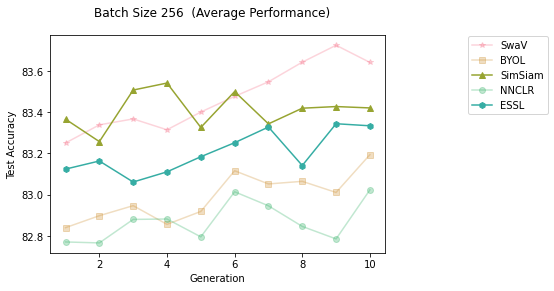

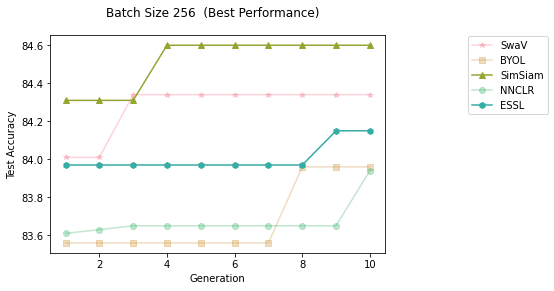

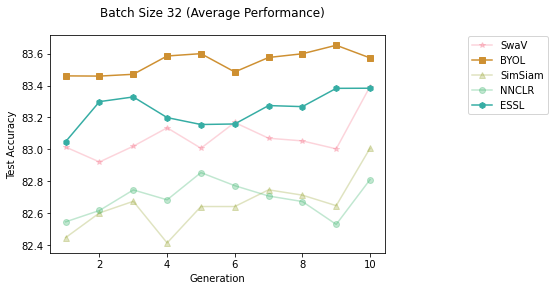

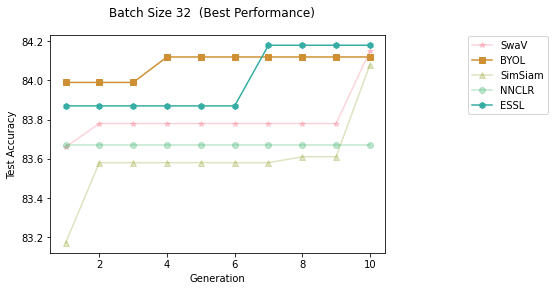

<Figure size 432x288 with 0 Axes>

In [4]:
# plot all four experiments
plot_exp(exp_names=b256_names, exps=b256, title="Batch Size 256  (Average Performance)", metric="avg", opacity=opacity_b256)
plot_exp(exp_names=b256_names, exps=b256, title="Batch Size 256  (Best Performance)", metric="max", opacity=opacity_b256)
plot_exp(exp_names=b32_names, exps=b32, title="Batch Size 32 (Average Performance)", metric="avg", opacity=opacity_b32)
plot_exp(exp_names=b32_names, exps=b32, title="Batch Size 32  (Best Performance)", metric="max", opacity=opacity_b32)

In [ ]:
Comparing loss curves of two exps

In [10]:
b256_best = ["/home/noah/ESSL/final_exps/optimization/exp8_2/1/tensorboard/scalars.csv",
             "/home/noah/ESSL/final_exps/essl/exp7/4/tensorboard/scalars.csv"]

b32_best = ["/home/noah/ESSL/final_exps/optimization/exp6_2/8/tensorboard/scalars.csv",
            "/home/noah/ESSL/final_exps/essl/exp6/4/tensorboard/scalars.csv"]

b256_df_so = pd.read_csv("/home/noah/ESSL/final_exps/optimization/exp8_2/1/tensorboard/scalars.csv")
b256_df_mo =  pd.read_csv("/home/noah/ESSL/final_exps/essl/exp7/4/tensorboard/scalars.csv")

b32_df_so = pd.read_csv("/home/noah/ESSL/final_exps/optimization/exp6_2/8/tensorboard/scalars.csv")
b32_df_mo =  pd.read_csv("/home/noah/ESSL/final_exps/essl/exp6/4/tensorboard/scalars.csv")

for so, mo in [b256_best, b32_best]:
    df_so = pd.read_csv(so)
    df_mo =  pd.read_csv(mo)
#     df_so = df_so[df_so["tag"] == "best_downstream_loss__gen_9"]
#     df_mo = df_mo[df_mo["tag"] == "best_downstream_loss__gen_9"]
df_so

,Unnamed: 0,run,tag,step,value
